In [5]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('BTC-USD.csv')
df = df[["Date","Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2020-03-01   8562.454102
1    2020-03-02   8869.669922
2    2020-03-03   8787.786133
3    2020-03-04   8755.246094
4    2020-03-05   9078.762695
..          ...           ...
361  2021-02-25  47093.851563
362  2021-02-26  46339.761719
363  2021-02-27  46188.453125
364  2021-02-28  45137.769531
365  2021-03-01  47637.566406

[366 rows x 2 columns]


In [8]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=720)
print(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds
0    2020-03-01
1    2020-03-02
2    2020-03-03
3    2020-03-04
4    2020-03-05
...         ...
1081 2023-02-15
1082 2023-02-16
1083 2023-02-17
1084 2023-02-18
1085 2023-02-19

[1086 rows x 1 columns]


In [9]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
886,2022-08-04,243396.275777,197744.211201,288206.013096
887,2022-08-05,243861.465599,198030.500821,288721.491783
888,2022-08-06,244183.173843,197519.112874,288731.874513
889,2022-08-07,244411.348597,197648.348603,290029.903923
890,2022-08-08,244866.038230,198289.416870,290943.179717
...,...,...,...,...
1081,2023-02-15,315580.684921,242660.300860,387521.032547
1082,2023-02-16,315875.805419,241699.390912,387657.410528
1083,2023-02-17,316340.995240,241169.987385,388428.334132
1084,2023-02-18,316662.703485,242240.643617,390691.252133


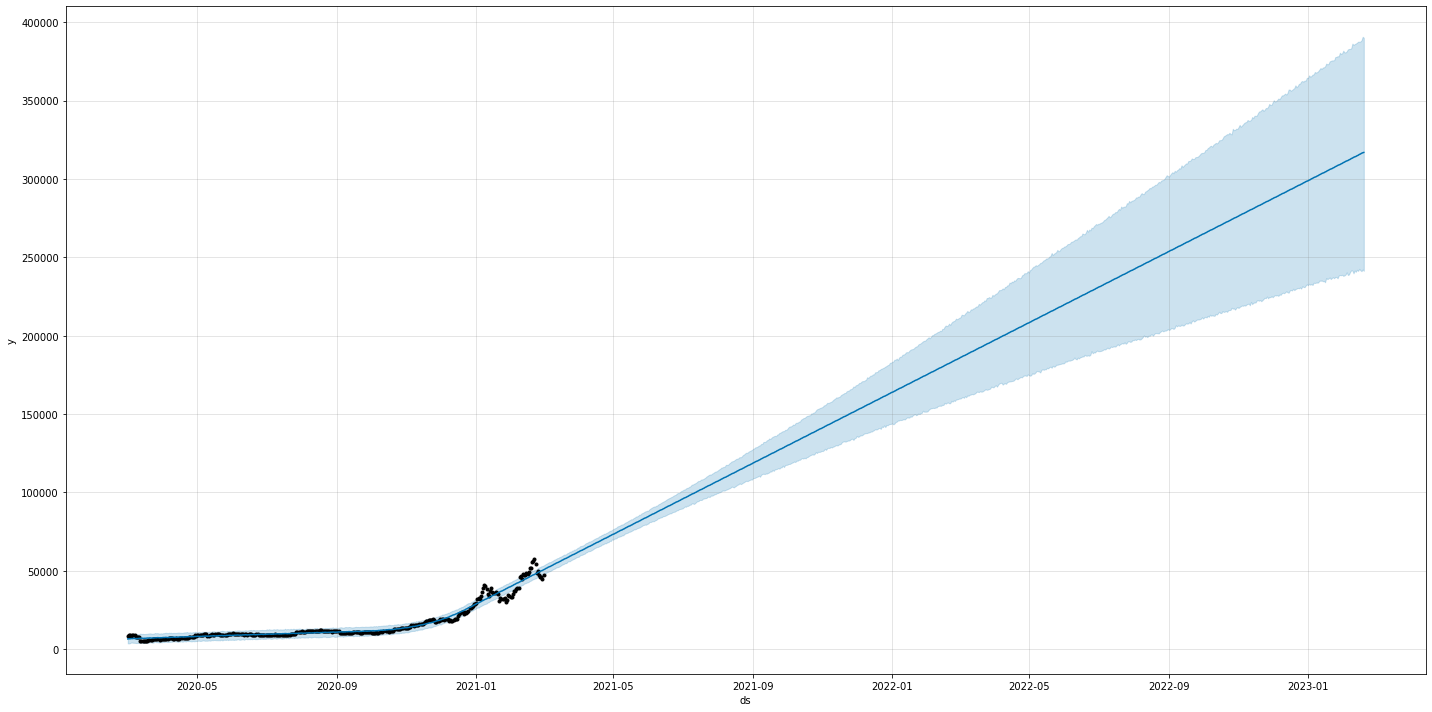

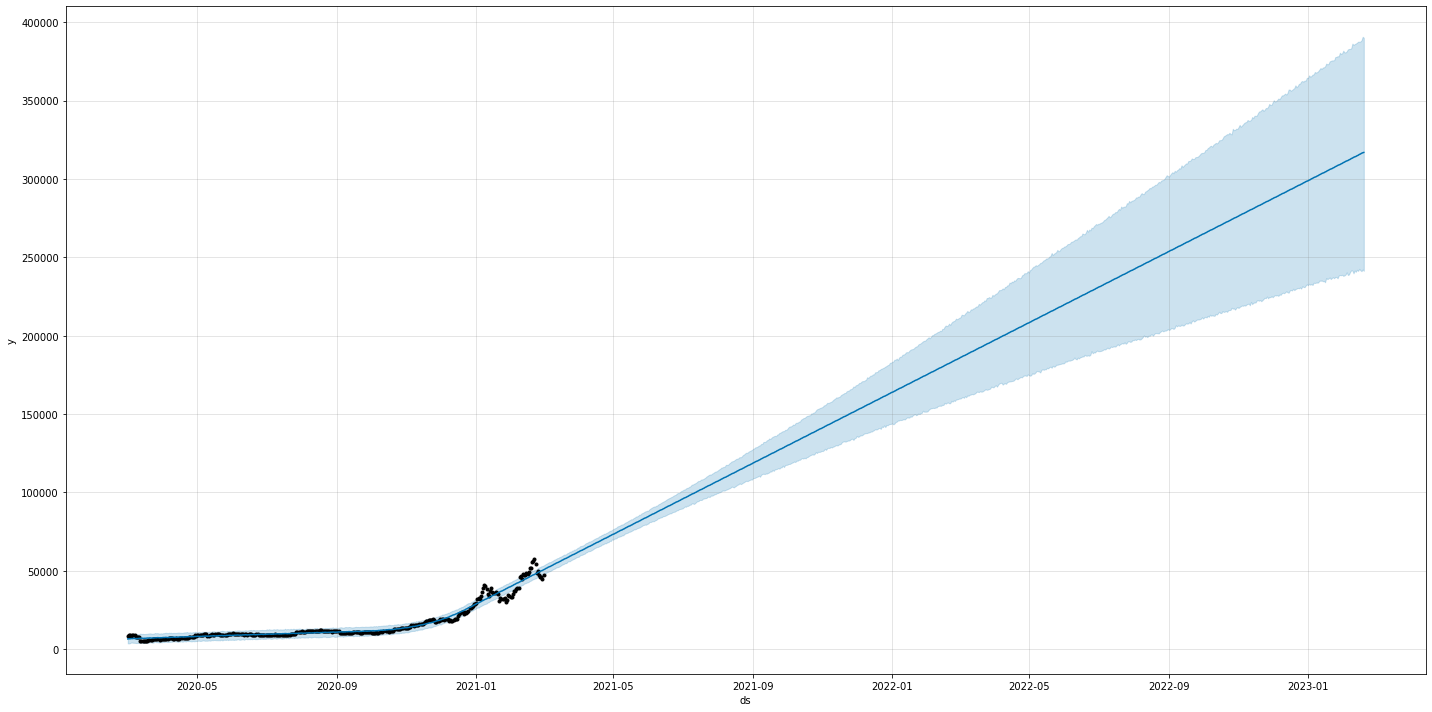

In [10]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20,10))